In [1]:
# import
import dask
import dask.array as da
import dask.dataframe as dd
from dask.distributed import Client, LocalCluster
from matplotlib import pyplot as plt

In [42]:
# single machine scheduler
raw_df = dd.read_csv(
    "../data/nyc_taxi.csv",
    blocksize=256e6,  # 256MB chunks
    )

In [43]:
dist = raw_df['trip_distance'].to_dask_array()
hist, bins = da.histogram(dist, bins=100, range=[0, 20])
hist

dask.array<sum-aggregate, shape=(100,), dtype=int64, chunksize=(100,), chunktype=numpy.ndarray>

In [44]:
# run!
hist_arr = hist.compute()

distributed.nanny - WARNING - Worker exceeded 95% memory budget. Restarting
distributed.nanny - WARNING - Worker exceeded 95% memory budget. Restarting
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Worker exceeded 95% memory budget. Restarting
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Worker exceeded 95% memory budget. Restarting
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Worker exceeded 95% memory budget. Restarting
distributed.nanny - WARNING - Restarting worker


KilledWorker: ("('from-delayed-histogram-sum-pandas_read_text-read-block-values-sum-2dd842fdfedb5cb47f823c649c8c961b', 0, 0)", <Worker 'tcp://127.0.0.1:33709', name: 2, memory: 0, processing: 2>)

distributed.nanny - WARNING - Worker exceeded 95% memory budget. Restarting
distributed.nanny - WARNING - Worker exceeded 95% memory budget. Restarting
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Worker exceeded 95% memory budget. Restarting
distributed.nanny - WARNING - Restarting worker


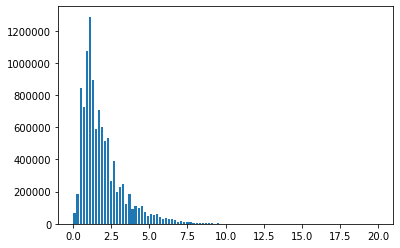

In [5]:
# plot
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist_arr, align='center', width=width)
plt.show()

In [41]:
# local cluster
# simulating memory limited enviroment
cluster = LocalCluster(
    n_workers=4, 
    threads_per_worker=1,
    memory_limit=1024e6)
client = Client(cluster)
cluster

LocalCluster('tcp://127.0.0.1:41299', workers=4, threads=4, memory=4.10 GB)

In [32]:
#dd.read_csv("../data/nyc_taxi.csv").to_parquet("../data/nyc_taxi.parquet", engine='fastparquet')

distributed.nanny - WARNING - Worker exceeded 95% memory budget. Restarting
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Worker exceeded 95% memory budget. Restarting
distributed.nanny - WARNING - Restarting worker


In [46]:
raw_df = dd.read_parquet(
    "../data/nyc_taxi.parquet",
    engien="fastparquet"
    )
raw_df.head(2)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_x,pickup_y,RateCodeID,store_and_fwd_flag,dropoff_x,dropoff_y,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
index,,,,,,,,,,,,,,,,,,,
0,2,2015-01-15 19:05:39,2015-01-15 19:23:42,1,1.59,-8.236963e+06,4.975553e+06,1,N,-8.234835e+06,4.975627e+06,1,12.0,1.0,0.5,3.25,0.0,0.3,17.05
1,1,2015-01-10 20:33:38,2015-01-10 20:53:28,1,3.30,-8.237826e+06,4.971752e+06,1,N,-8.237021e+06,4.976875e+06,1,14.5,0.5,0.5,2.00,0.0,0.3,17.80


In [47]:
dist = raw_df['trip_distance'].to_dask_array()
hist, bins = da.histogram(dist, bins=100, range=[0, 20])
hist

dask.array<sum-aggregate, shape=(100,), dtype=int64, chunksize=(100,), chunktype=numpy.ndarray>

In [50]:
hist_arr = hist.compute()

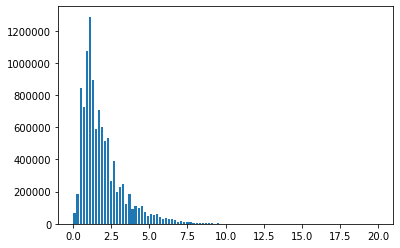

In [51]:
# plot
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist_arr, align='center', width=width)
plt.show()